In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import object from libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
# read file
df = pd.read_csv('CVD.csv')

In [8]:
# show corrlation
df.corr()

,Unnamed: 0,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
Unnamed: 0,1.000000,0.182062,0.208989,-0.361703,0.052865,0.023096,-0.035954,-0.043015,-0.387853,0.351133,0.293177,-0.233318,0.414809,0.321910,-0.853886
Age,0.182062,1.000000,-0.069417,-0.036687,0.269206,0.126272,0.128132,-0.088209,-0.406364,0.091579,0.197959,-0.145601,0.387995,0.072132,-0.202609
Sex,0.208989,-0.069417,1.000000,-0.086131,0.006221,-0.122332,0.051853,-0.092184,-0.044728,0.169701,0.168705,-0.052707,0.079411,0.255335,-0.320077
Cp,-0.361703,-0.036687,-0.086131,1.000000,0.116830,-0.050276,0.157473,0.068872,0.264261,-0.373298,-0.120406,0.071156,-0.200986,-0.191622,0.397467
Trtbps,0.052865,0.269206,0.006221,0.116830,1.000000,0.087588,0.124420,-0.122371,0.000209,-0.013377,0.157895,-0.058245,0.041302,0.009877,-0.080746
Chol,0.023096,0.126272,-0.122332,-0.050276,0.087588,1.000000,-0.000894,-0.120918,-0.003465,0.050517,-0.024949,0.045319,0.107527,0.070133,-0.096066
Fbs,-0.035954,0.128132,0.051853,0.157473,0.124420,-0.000894,1.000000,-0.071280,0.014911,-0.001178,0.024125,-0.075260,0.096418,-0.054978,0.009424
Restecg,-0.043015,-0.088209,-0.092184,0.068872,-0.122371,-0.120918,-0.071280,1.000000,0.067840,-0.102762,-0.091094,0.125154,-0.079273,0.043220,0.149274
Thalachh,-0.387853,-0.406364,-0.044728,0.264261,0.000209,-0.003465,0.014911,0.067840,1.000000,-0.424601,-0.346101,0.370140,-0.227522,-0.156594,0.393281
Exng,0.351133,0.091579,0.169701,-0.373298,-0.013377,0.050517,-0.001178,-0.102762,-0.424601,1.000000,0.348831,-0.263215,0.188634,0.241075,-0.424802


In [9]:
#drop 'Unnamed: 0' column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
# show data frame
df

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
254,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
255,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
256,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
#select features to start modeling

x = df[['Age','Sex','Cp','Restecg','Thalachh','Exng','Slp','Thall']]
x = x.to_numpy()
y = df[['Output']]
y = y.to_numpy()
y = y.reshape(-1,1)

In [12]:
y = df[['Output']]

In [13]:
x = x.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [15]:
y = y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [16]:
y = y.reshape(-1,1)

In [17]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

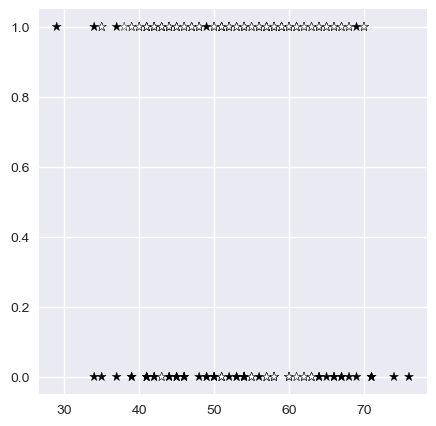

In [21]:
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1], c=y, marker='*',s=45, edgecolors='black')

In [25]:
# apply knn with k = 5,1
x = df[['Age','Sex','Cp','Restecg','Thalachh','Exng','Slp','Thall']]
x = x.to_numpy()
y = df[['Output']]
y = y.to_numpy()
y = y.reshape(-1,1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42)
knn5 = KNeighborsClassifier(n_neighbors=5
                           )
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(xtrain,ytrain)
knn1.fit(xtrain,ytrain)
ypred_5 = knn5.predict(xtest)
ypred_1 = knn1.predict(xtest)
from sklearn.metrics import accuracy_score
print('Accuracy with k=5', accuracy_score(ytest,ypred_5) *100)
print('Accuracy with k=1', accuracy_score(ytest,ypred_1) *100)

Accuracy with k=5 80.0
Accuracy with k=1 75.38461538461539


C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims

In [34]:
# give the accuracy with k=17
knn5 = KNeighborsClassifier(n_neighbors=17
                           )
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(xtrain,ytrain)
knn1.fit(xtrain,ytrain)
ypred_55 = knn5.predict(xtest)
ypred_1 = knn1.predict(xtest)
from sklearn.metrics import accuracy_score
print('Accuracy with k=17', accuracy_score(ytest,ypred_5) *100)

Accuracy with k=17 76.92307692307693


C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims

In [35]:
knn5.fit(xtrain,ytrain)
knn1.fit(xtrain,ytrain)
ypred_5 = knn5.predict(xtest)
ypred_1 = knn1.predict(xtest)
from sklearn.metrics import accuracy_score
print('Accuracy with k=17', accuracy_score(ytest,ypred_5) *100)

Accuracy with k=17 76.92307692307693


C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy with k=5', accuracy_score(ytest,ypred_5) *100)

Accuracy with k=5 76.92307692307693


In [37]:
print('Accuracy with k=5', accuracy_score(ytest,ypred_5) *100)

Accuracy with k=5 76.92307692307693


In [38]:
print('Accuracy with k=1', accuracy_score(ytest,ypred_1)*100)

Accuracy with k=1 75.38461538461539


C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ahmad bsis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default be

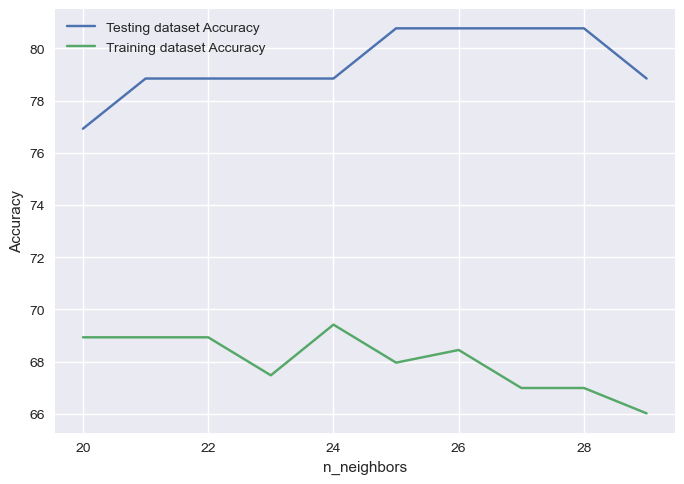

In [47]:
#try another alghorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
  

  
# Create feature and target arrays
x = df[['Age','Sex','Cp','Restecg','Thalachh','Exng','Slp','Thall']]
y = df[['Output']]
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)
  
neighbors = np.arange(20, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)*100
    test_accuracy[i] = knn.score(X_test, y_test)*100
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [48]:
df[df['Output']==1]

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
146,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
147,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
148,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1


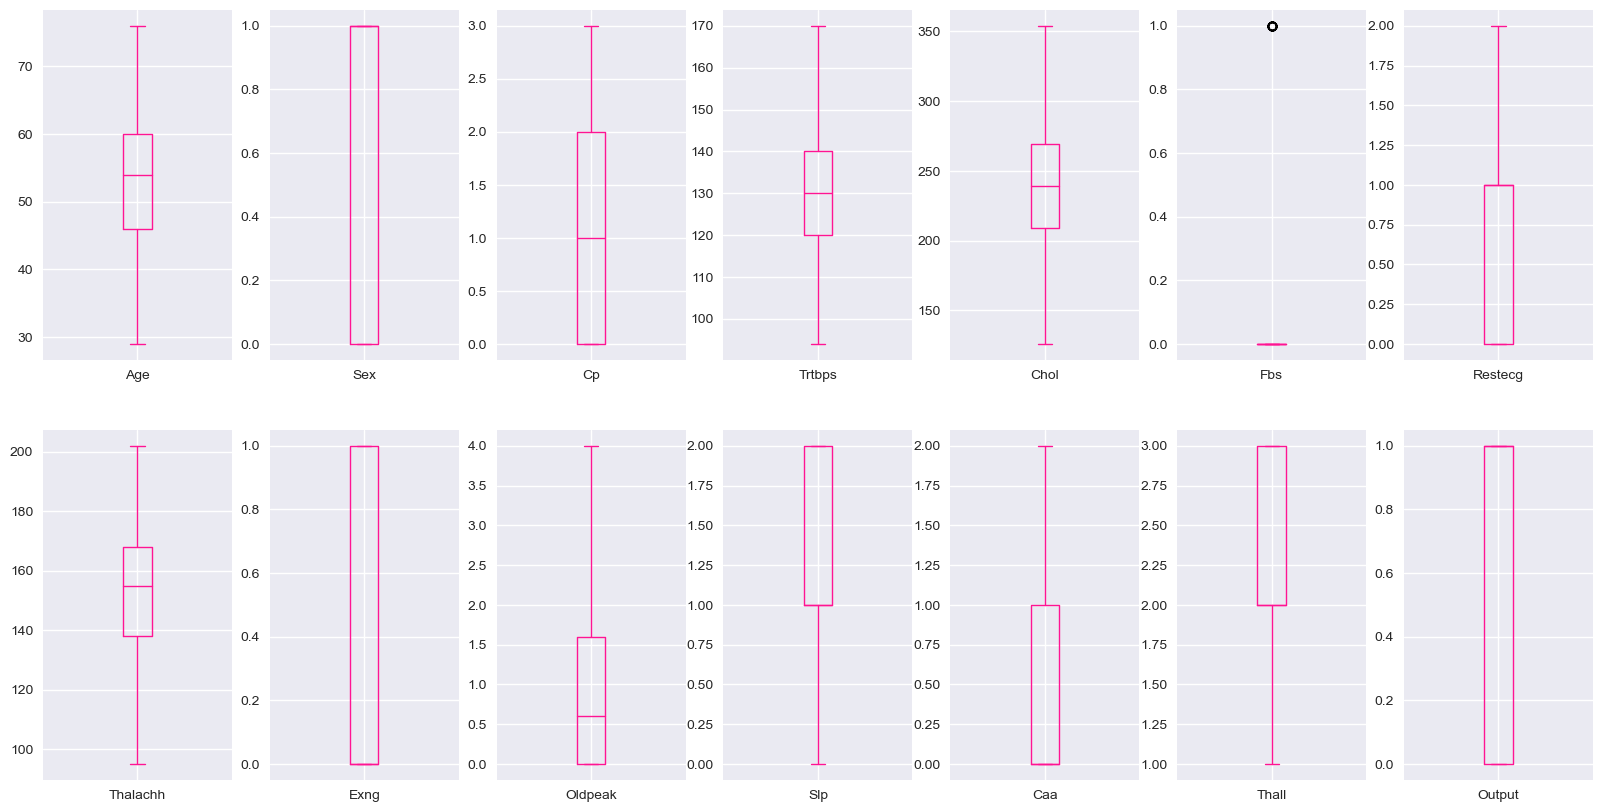

In [49]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [52]:
import plotly.express as px
fig = px.box(df, x="Output", y="Cp")
fig.show()

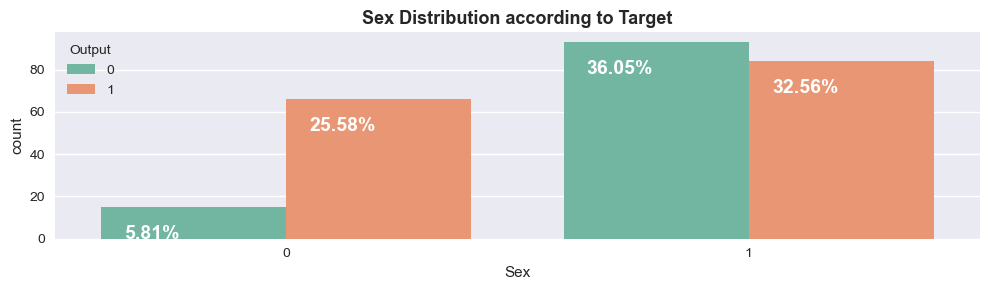

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,3))
name = df['Sex']
ax = sns.countplot(x='Sex', hue='Output', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
#ax.set_xticklabels(name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

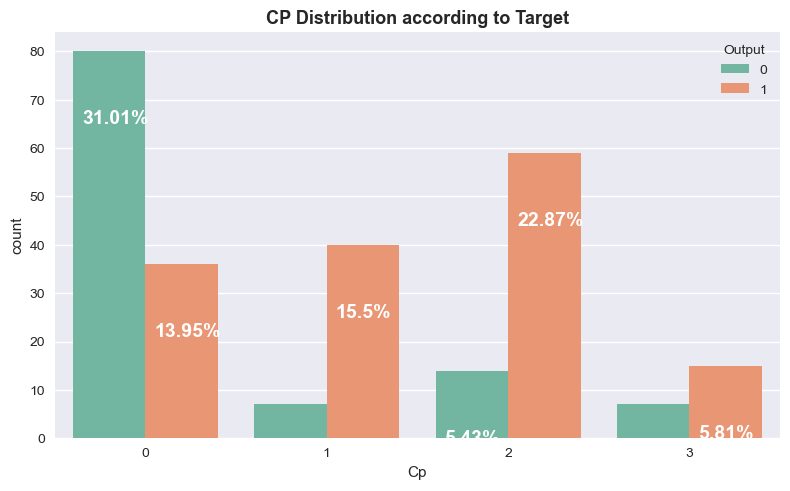

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Cp']
ax = sns.countplot(x='Cp', hue='Output', data=df, palette='Set2')
ax.set_title("CP Distribution according to Target", fontsize = 13, weight = 'bold')
#ax.set_xticklabels(name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

C:\Users\ahmad bsis\AppData\Local\Temp\ipykernel_22868\899531587.py:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


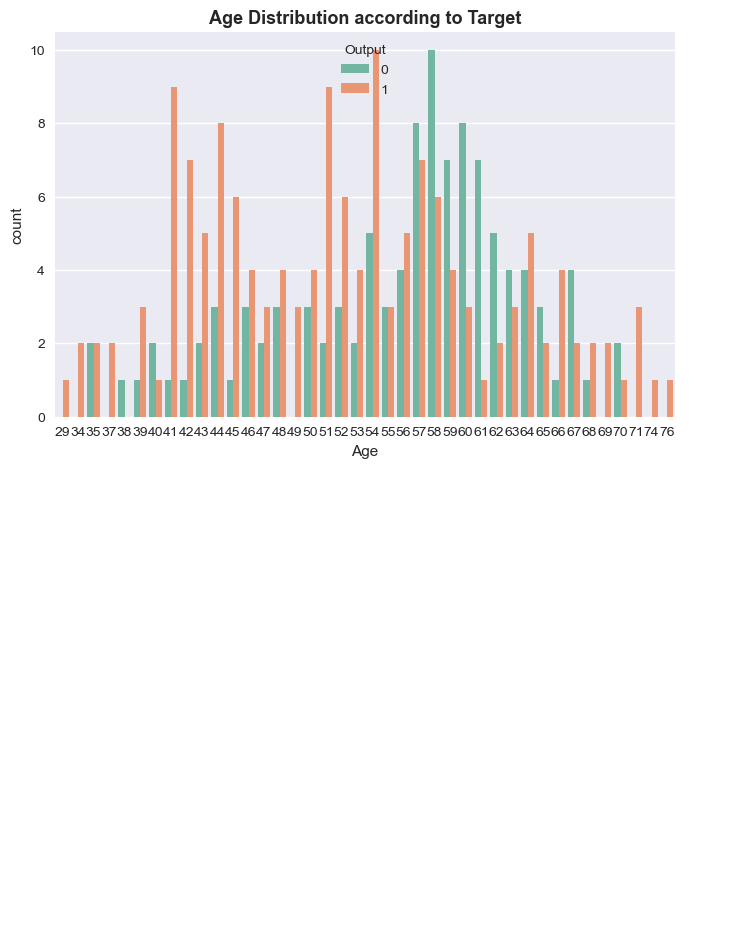

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Age']
ax = sns.countplot(x='Age', hue='Output', data=df, palette='Set2')
ax.set_title("Age Distribution according to Target", fontsize = 13, weight = 'bold')
#ax.set_xticklabels(name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

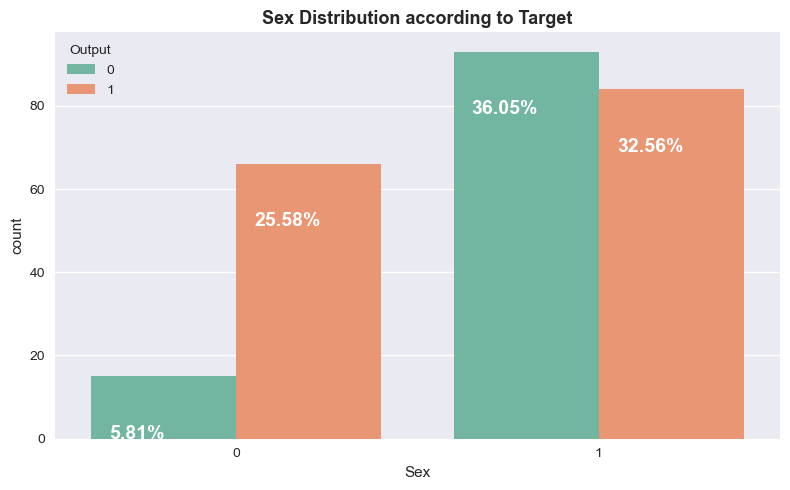

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='Sex', hue='Output', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
#ax.set_xticklabels(name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()